In [101]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
from matplotlib.patches import Arc, Circle
import networkx as nx
import community
from matplotlib.patches import Circle, Rectangle, Arc
%matplotlib inline
import matplotlib.image as mpimg

In [102]:
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

/Users/macuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  app.launch_new_instance()
/Users/macuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
/Users/macuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
/Users/macuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
/Users/macuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
/Users/macuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Setting th

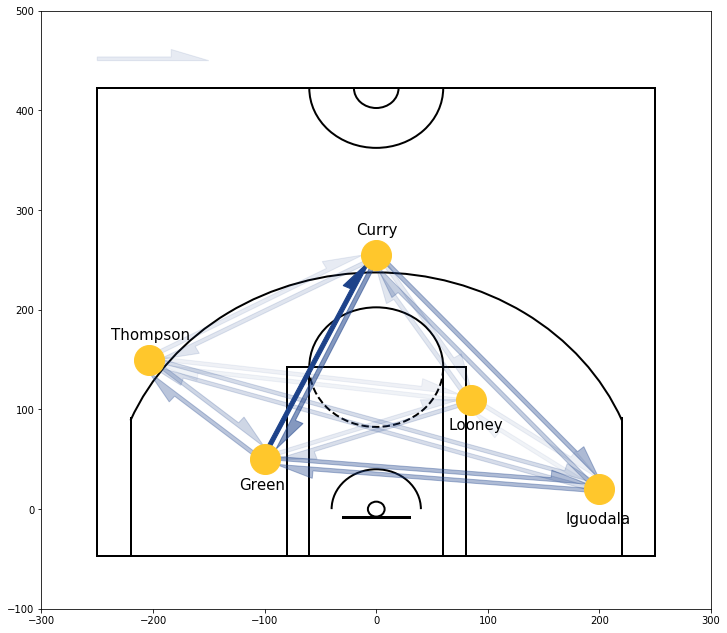

In [200]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.plot(0, 255, color = '#FFC72C', marker='o', markersize=30, label='Curry', zorder=20)
plt.plot(-204, 150, color = '#FFC72C', marker='o', markersize=30, label='Thompson', zorder=20)
plt.plot(-100, 50, color = '#FFC72C', marker='o', markersize=30, label='Green', zorder=20)
plt.plot(85, 110, color = '#FFC72C', marker='o', markersize=30, label='Looney', zorder=20)
plt.plot(200, 20, color = '#FFC72C', marker='o', markersize=30, label='Iguodala', zorder=20)
plt.annotate('Curry', (-18, 275), size=15, zorder=3)
plt.annotate('Thompson', (-238, 170), size=15, zorder=3)
plt.annotate('Green', (-123, 20), size=15, zorder=3)
plt.annotate('Looney', (65, 80), size = 15, zorder=3)
plt.annotate('Iguodala', (170, -15), size = 15, zorder=3)
# Curry to Thompson
plt.arrow(-204, 150, 192, 105, zorder=1, color = '#1D428A', alpha = 0.1, width=7.8, shape='right', length_includes_head=True, edgecolor='black')
plt.arrow(0,255,-195,-105, zorder=1, color = '#1D428A', width=7.8, alpha = 2/15, shape='right', length_includes_head=True, edgecolor='black')

# Curry to Looney
plt.arrow(85,110,-85,132, zorder=1, color = '#1D428A', width=7.8, alpha = 23/180, shape='right', length_includes_head=True, edgecolor='black')
plt.arrow(0,255,85,-135, zorder=1, color = '#1D428A', width=7.8, alpha = 1/9, shape='right', length_includes_head=True, edgecolor='black')

# Curry to Green
plt.arrow(-100,50,95,200, zorder=1, color = '#1D428A', alpha = 1, width=7.5, shape='right', length_includes_head=True, edgecolor='black')
plt.arrow(0,255,-90,-195, zorder=1, color = '#1D428A', alpha = 13/24, width=7.5, shape='right', length_includes_head=True, edgecolor='black')

# Curry to Iguodala
#plt.arrow(200,20,-200,235, zorder=1, color = '#1D428A', width=13, shape='right', length_includes_head=True, edgecolor='black')
plt.arrow(200,20,-200,225, zorder=1, color = '#1D428A', width = 7.5, alpha = 0.26, shape='right', length_includes_head=True, edgecolor='black')
#plt.arrow(0,255,200,-235, zorder=1, color = '#1D428A', width=9.5, shape='right', length_includes_head=True)
plt.arrow(0,255,200,-225, zorder=1, color = '#1D428A', width = 7.5, alpha = 0.36, shape='right', length_includes_head=True)

# Looney to Green 
plt.arrow(85,110,-175,-60, zorder=1, color = '#1D428A', width=7.8, alpha = 31/180, shape='right', length_includes_head=True)
plt.arrow(-100,50,175,60, zorder=1, color = '#1D428A', alpha = 37/360, width=7.5, shape='right', length_includes_head=True)

# Looney to Thompson
plt.arrow(85,110,-279,35, zorder=1, color = '#1D428A', width=7.8, alpha = 11/180, shape='right', length_includes_head=True)
plt.arrow(-204, 150, 279,-35, zorder=1, color = '#1D428A', alpha = 13/180, width=7.8, shape='right', length_includes_head=True)

# Looney to Iguodala
plt.arrow(85,110, 115, -80, zorder=1, color = '#1D428A', width=7.5, alpha = 7/90, shape='right', length_includes_head=True)
plt.arrow(200, 20, -115, 80, zorder=1, color = '#1D428A', width = 7.5, alpha = 11/180, shape='right', length_includes_head=True)

# Green to Thompson 
plt.arrow(-100, 50, -104, 88, zorder=1, color = '#1D428A', alpha = 0.3, width=7.5, shape='right', length_includes_head=True)
plt.arrow(-204, 150, 104, -88, zorder=1, color = '#1D428A', alpha = 78/360, width=7.5, shape='right', length_includes_head=True)

# Green to Iguodala
plt.arrow(-100, 50, 290, -25, zorder=1, color = '#1D428A', alpha = 16/45, width=7.5, shape='right', length_includes_head=True)
plt.arrow(200, 20, -290, 25, zorder=1, color = '#1D428A', alpha = 128/360, width=7.5, shape='right', length_includes_head=True)

# Thompson to Iguodala
plt.arrow(-204, 150, 404, -125, zorder=1, color = '#1D428A', alpha = 11/60, width=7.5, shape='right', length_includes_head=True)
plt.arrow(200, 20, -404, 125, zorder=1, color = '#1D428A', alpha = 7/40, width=7.5, shape='right', length_includes_head=True)
plt.arrow(-250, 450, 100, 0, zorder=1, color = '#1D428A', alpha = 0.1, width=7.5, shape='right', length_includes_head=True)

plt.show()

/Users/macuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
/Users/macuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
/Users/macuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
/Users/macuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
/Users/macuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
/Users/macuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Setting the 'color' property will over

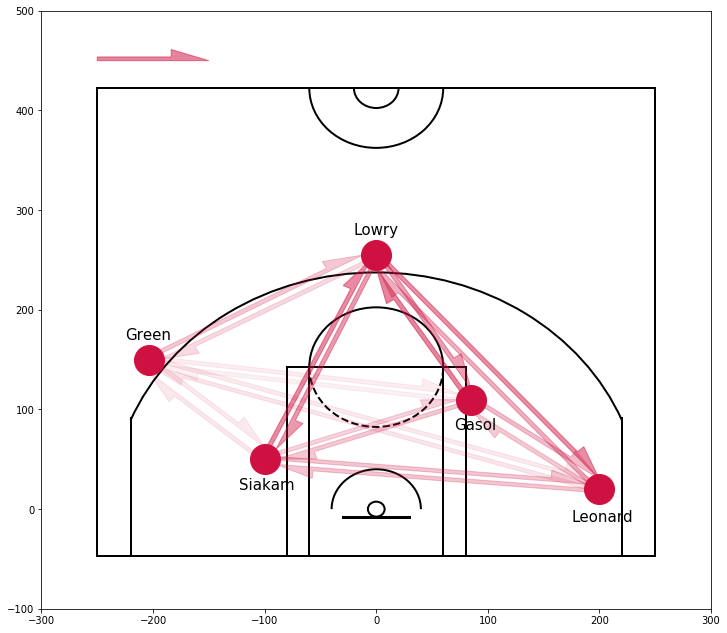

In [206]:
line_color = '#CE1141'
node_color = '#000000'
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.plot(0, 255, color = '#CE1141', marker='o', markersize=30, label='Lowry', zorder=20)
plt.plot(-204, 150, color = '#CE1141', marker='o', markersize=30, label='Green', zorder=20)
plt.plot(-100, 50, color = '#CE1141', marker='o', markersize=30, label='Siakam', zorder=20)
plt.plot(85, 110, color = '#CE1141', marker='o', markersize=30, label='Gasol', zorder=20)
plt.plot(200, 20, color = '#CE1141', marker='o', markersize=30, label='Leonard', zorder=20)
plt.annotate('Lowry', (-20, 275), size=15, zorder=3)
plt.annotate('Green', (-225, 170), size=15, zorder=3)
plt.annotate('Siakam', (-123, 20), size=15, zorder=3)
plt.annotate('Gasol', (70, 80), size = 15, zorder=3)
plt.annotate('Leonard', (175, -13), size = 15, zorder=3)

# Lowry to Green 
plt.arrow(0,255,-195,-105, zorder=1, color = line_color, width=7.8, alpha = 57/360, shape='right', length_includes_head=True, edgecolor='black')
plt.arrow(-204, 150, 192, 105, zorder=1, color = line_color, alpha = 82/360, width=7.8, shape='right', length_includes_head=True, edgecolor='black')

# Lowry to Gasol
plt.arrow(0,255,85,-135, zorder=1, color = line_color, width=7.8, alpha = 145/360, shape='right', length_includes_head=True, edgecolor='black')
plt.arrow(85,110,-85,132, zorder=1, color = line_color, width=7.8, alpha = 187/360, shape='right', length_includes_head=True, edgecolor='black')

# Lowry to Siakam
plt.arrow(0,255,-90,-195, zorder=1, color = line_color, alpha = 153/360, width=7.5, shape='right', length_includes_head=True, edgecolor='black')
plt.arrow(-100,50,95,200, zorder=1, color = line_color, alpha = 177/360, width=7.5, shape='right', length_includes_head=True, edgecolor='black')

# Lowry to Leonard
plt.arrow(0,255,200,-225, zorder=1, color = line_color, width = 7.5, alpha = 172/360, shape='right', length_includes_head=True)
plt.arrow(200,20,-200,225, zorder=1, color = line_color, width = 7.5, alpha = 122/360, shape='right', length_includes_head=True, edgecolor='black')

# Gasol to Siakam
plt.arrow(85,110,-175,-60, zorder=1, color = line_color, width=7.8, alpha = 82/360, shape='right', length_includes_head=True)
plt.arrow(-100,50,175,60, zorder=1, color = line_color, alpha = 67/360, width=7.5, shape='right', length_includes_head=True)

# Gasol to Green 
plt.arrow(85,110,-279,35, zorder=1, color = line_color, width=7.8, alpha = 22/360, shape='right', length_includes_head=True)
plt.arrow(-204, 150, 279,-35, zorder=1, color = line_color, alpha = 27/360, width=7.8, shape='right', length_includes_head=True)

# Gasol to Leonard
plt.arrow(85,110, 115, -80, zorder=1, color = line_color, width=7.5, alpha = 102/360, shape='right', length_includes_head=True)
plt.arrow(200, 20, -115, 80, zorder=1, color = line_color, width = 7.5, alpha = 80/360, shape='right', length_includes_head=True)

# Siakam to Green 
plt.arrow(-100, 50, -104, 88, zorder=1, color = line_color, alpha = 35/360, width=7.5, shape='right', length_includes_head=True)
plt.arrow(-204, 150, 104, -88, zorder=1, color = line_color, alpha = 33/360, width=7.5, shape='right', length_includes_head=True)

# Siakam to Leonard
plt.arrow(-100, 50, 290, -25, zorder=1, color = line_color, alpha = 88/360, width=7.5, shape='right', length_includes_head=True)
plt.arrow(200, 20, -290, 25, zorder=1, color = line_color, alpha = 88/360, width=7.5, shape='right', length_includes_head=True)

# Green to Leonard 
plt.arrow(-204, 150, 404, -125, zorder=1, color = line_color, alpha = 33/360, width=7.5, shape='right', length_includes_head=True)
plt.arrow(200, 20, -404, 125, zorder=1, color = line_color, alpha = 38/360, width=7.5, shape='right', length_includes_head=True)

plt.arrow(-250, 450, 100, 0, zorder=1, color = line_color, alpha = 187/360, width=7.5, shape='right', length_includes_head=True)
plt.show()